In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#adding data to a dataframe 
dd=pd.read_excel("ANZ synthesised transaction dataset.xlsx")
dd.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
#counting unique accounts
dd["account"].nunique()

100

In [4]:
dd["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
2018-09-21    160
2018-10-03    160
2018-10-04    159
2018-09-27    159
2018-10-19    158
2018-08-03    157
2018-10-26    157
2018-08-24    156
2018-09-13    154
2018-10-12    154
2018-08-31    153
2018-08-23    152
2018-08-02    152
2018-09-07    152
2018-09-06    152
2018-08-10    151
2018-10-18    150
2018-08-22    150
2018-09-26    149
2018-09-05    149
2018-09-12    149
2018-08-09    149
2018-10-24    148
2018-09-19    148
2018-10-10    146
             ... 
2018-08-19    118
2018-08-21    118
2018-09-11    118
2018-09-16    118
2018-09-25    117
2018-08-14    117
2018-08-26    116
2018-09-23    114
2018-08-07    114
2018-10-09    113
2018-10-15    112
2018-09-17    112
2018-10-22    112
2018-08-27    111
2018-09-03    109
2018-08-12    109
2018-09-30    107
2018-10-07    105
2018-08-13    104
2018-10-01    103
2018-09-10    103
2018-10-29    102
2018-10-16    102
2018-09-24    101
2018-08-05

In [5]:
#TOTAL VALUE OF THE CUSTOMER ID
dd["customer_id"].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
CUS-1196156254    245
CUS-2695611575    239
CUS-51506836      239
CUS-860700529     233
CUS-1669695324    230
CUS-127297539     199
CUS-883482547     178
CUS-4142663097    174
CUS-443776336     170
CUS-4023861240    169
CUS-164374203     166
CUS-2663907001    165
CUS-325142416     163
CUS-3142625864    163
CUS-1433879684    155
CUS-537508723     152
CUS-527400765     151
CUS-2178051368    148
CUS-3336454548    145
CUS-1790886359    144
CUS-3325710106    141
CUS-2376382098    139
CUS-3117610635    139
CUS-3129499595    137
CUS-261674136     134
                 ... 
CUS-3904958894     80
CUS-2738291516     80
CUS-880898248      78
CUS-423725039      78
CUS-1816693151     78
CUS-134833760      77
CUS-134193016      76
CUS-1220154422     75
CUS-1005756958     73
CUS-2484453271     72
CUS-2370108457     67
CUS-2819545904     63
CUS-331942311      62
CUS-3989008654     62
CUS-263089

In [6]:
# DESCRIPTION ABOUT COLUMNS
dd.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [7]:
#TRANSACTION VOLUME OVER DATES

In [8]:
#grouping the amount by date
date_grp=dd.groupby('date')['amount'].sum().reset_index()
date_grp.head()

,date,amount
0,2018-08-01,29867.94
1,2018-08-02,21786.32
2,2018-08-03,38096.58
3,2018-08-04,6296.05
4,2018-08-05,4426.50


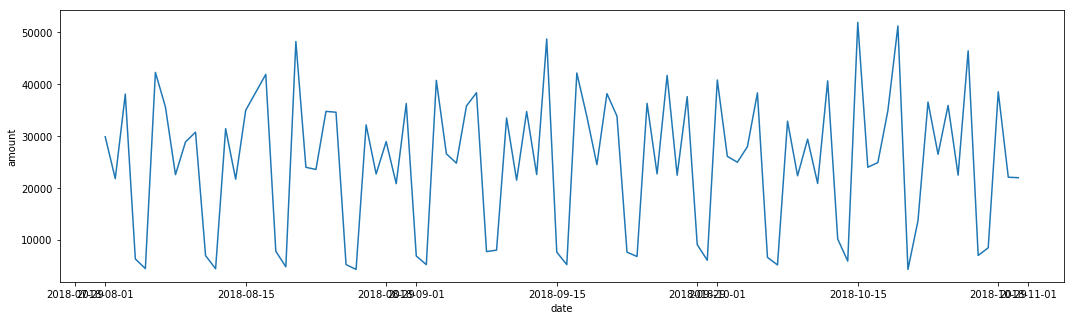

In [9]:
plt.figure(figsize=(18,5))
sns.lineplot(y="amount",x="date",data=date_grp)

In [7]:
#Mean transaction amount per day

In [8]:
date_mean=dd.groupby('date')['amount'].mean().reset_index()
date_mean.head()

,date,amount
0,2018-08-01,218.014161
1,2018-08-02,143.331053
2,2018-08-03,242.653376
3,2018-08-04,53.356356
4,2018-08-05,44.265000


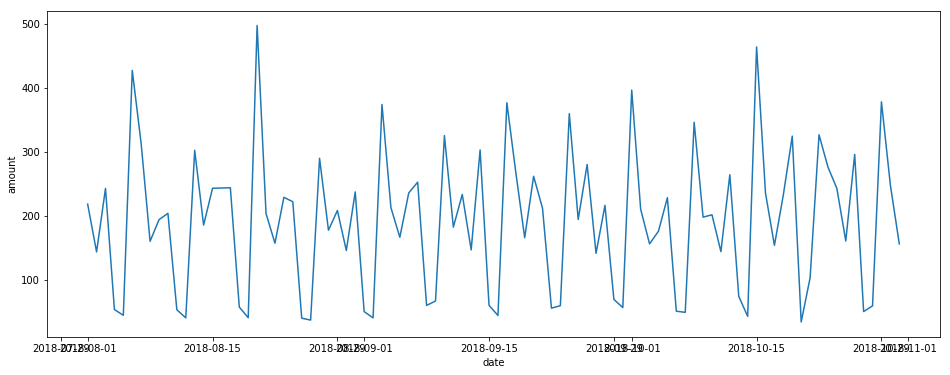

In [9]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",data=date_mean)

In [10]:
#TRANSACTION VOLUME BY GENDER

In [11]:
gender_vol=dd[['date','gender','amount']]
gender_vol.head()

,date,gender,amount
0,2018-08-01,F,16.25
1,2018-08-01,F,14.19
2,2018-08-01,M,6.42
3,2018-08-01,F,40.90
4,2018-08-01,F,3.25


In [12]:
gender_data = gender_vol.groupby(['date',"gender"])["amount"].sum().reset_index()
gender_data.head()

,date,gender,amount
0,2018-08-01,F,13628.64
1,2018-08-01,M,16239.30
2,2018-08-02,F,5896.25
3,2018-08-02,M,15890.07
4,2018-08-03,F,17091.59


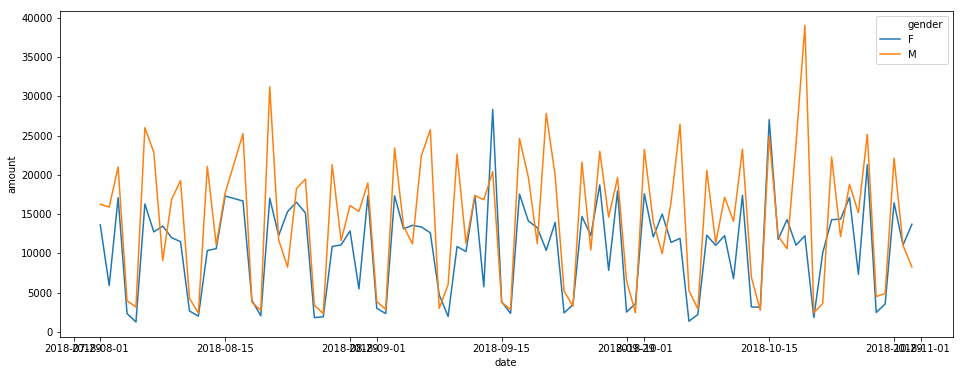

In [13]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="gender",data=gender_data)

In [14]:
#Mean transaction by gender

In [15]:
gender_mean = gender_vol.groupby(['date',"gender"])["amount"].mean().reset_index()
gender_mean.head()

,date,gender,amount
0,2018-08-01,F,191.952676
1,2018-08-01,M,246.050000
2,2018-08-02,F,85.452899
3,2018-08-02,M,191.446627
4,2018-08-03,F,216.349241


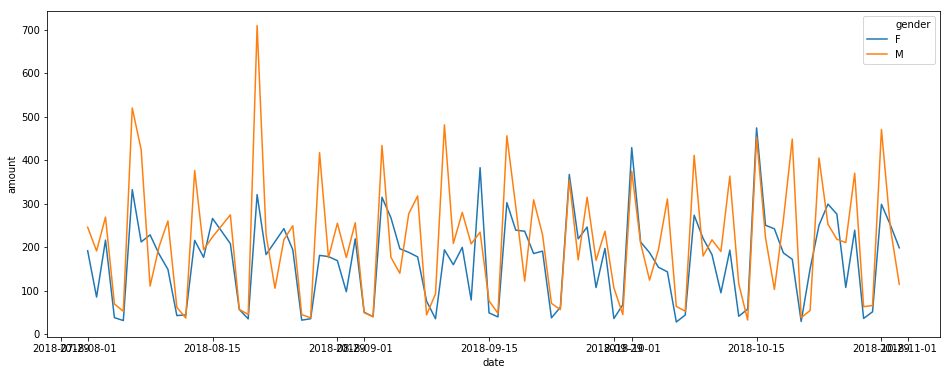

In [16]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="gender", data=gender_mean)

In [17]:
#Transaction volume by merchant state

In [18]:
merchant=dd.groupby(["date","merchant_state"])["amount"].sum().reset_index()
merchant.head()

,date,merchant_state,amount
0,2018-08-01,NSW,828.36
1,2018-08-01,NT,73.25
2,2018-08-01,QLD,921.76
3,2018-08-01,SA,62.37
4,2018-08-01,TAS,17.13


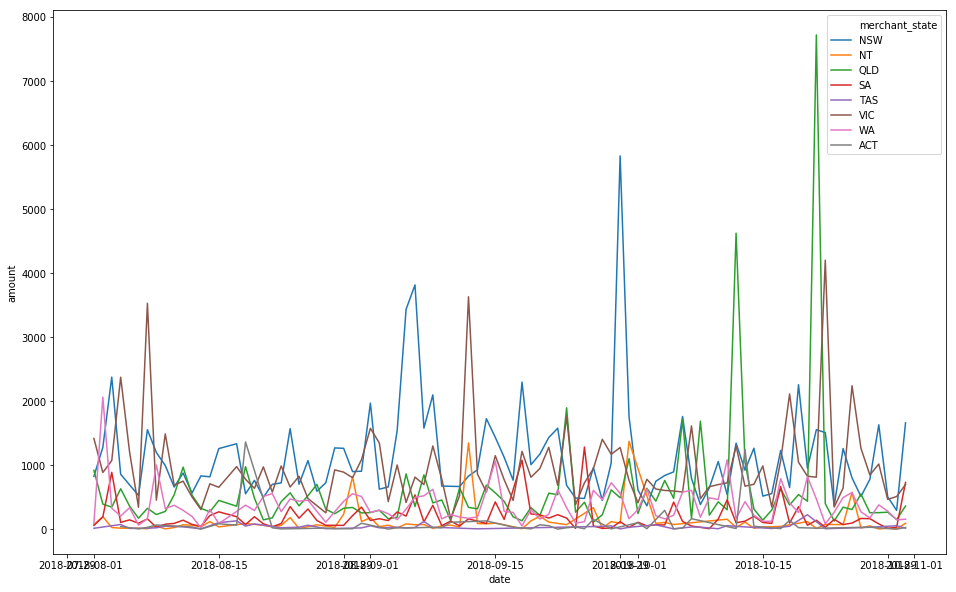

In [19]:
plt.figure(figsize=(16, 10))
sns.lineplot(y="amount",x="date",hue="merchant_state", data=merchant)

In [20]:
#Transaction volume by merchant state (barplot)

In [21]:
merchant_state_total = dd.groupby(["merchant_state","gender"])["amount"].sum().reset_index()
merchant_state_total.head()

,merchant_state,gender,amount
0,ACT,F,1657.44
1,ACT,M,3219.24
2,NSW,F,41430.88
3,NSW,M,60590.89
4,NT,F,8741.42


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


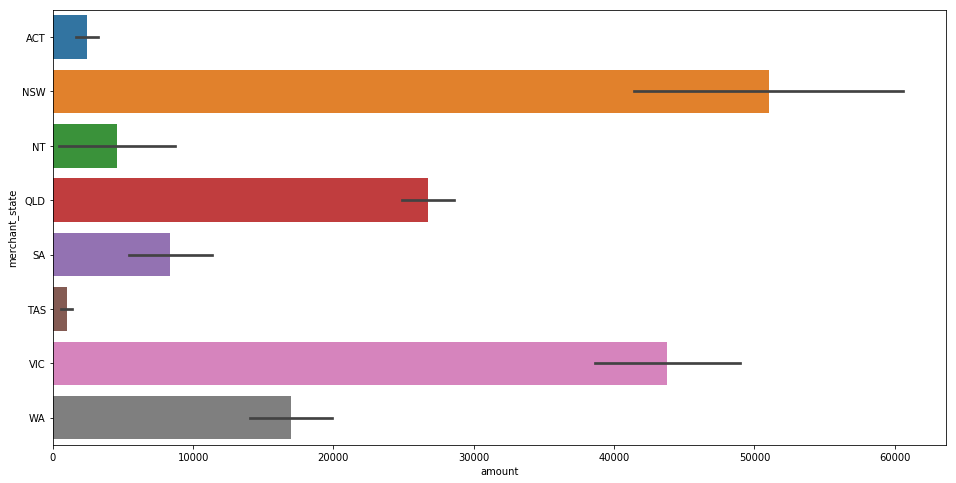

In [22]:
plt.figure(figsize=(16,8))
sns.barplot(x="amount", y="merchant_state",data=merchant_state_total)

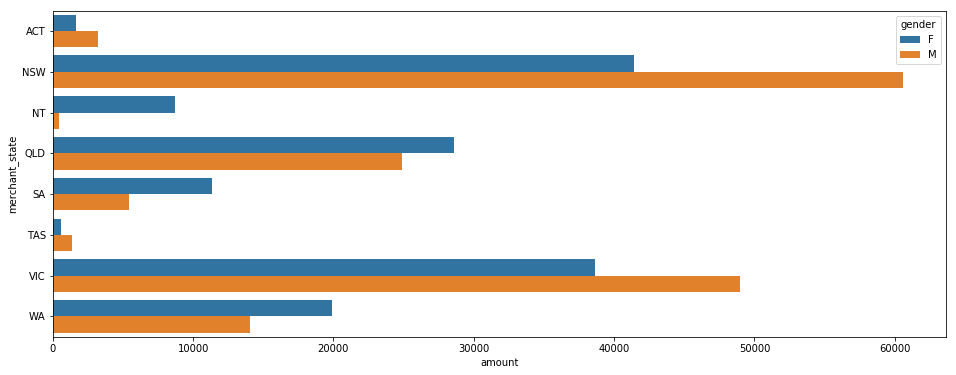

In [23]:
plt.figure(figsize=(16, 6))
sns.barplot(x="amount", y="merchant_state",hue="gender",data=merchant_state_total)

In [24]:
#Mean transaction volume by merchant state

In [25]:
mean_merchant=dd.groupby(["date","merchant_state"])["amount"].mean().reset_index()
mean_merchant.head()

,date,merchant_state,amount
0,2018-08-01,NSW,29.584286
1,2018-08-01,NT,24.416667
2,2018-08-01,QLD,54.221176
3,2018-08-01,SA,15.592500
4,2018-08-01,TAS,17.130000


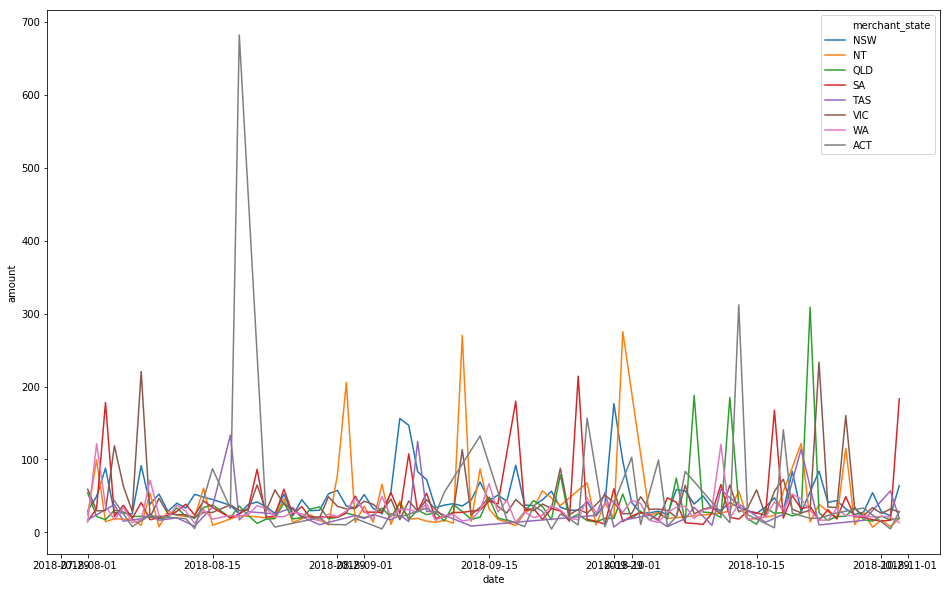

In [26]:
plt.figure(figsize=(16, 10))
sns.lineplot(y="amount",x="date",hue="merchant_state", data=mean_merchant)

In [27]:
#Transaction volume by merchant suburb (sum)

In [28]:
merchant_suburb= dd.groupby(["merchant_suburb"])["amount"].sum().reset_index()
merchant_suburb.head()

,merchant_suburb,amount
0,Abbotsford,2004.29
1,Aberdeen,52.45
2,Aberfeldie,57.77
3,Aberfoyle Park,84.92
4,Acacia Ridge,10.30


In [29]:
suburb=merchant_suburb.sort_values(by='amount',ascending=False)
print("Top 10 regions with most transaction")
print(suburb.head(10).values)

Top 10 regions with most transaction
[['Sydney' 21675.44000000002]
 ['Melbourne' 11943.529999999995]
 ['South Brisbane' 11740.58]
 ['Mascot' 10282.619999999999]
 ['Mount Gambier' 4710.25]
 ['Malvern' 3994.8300000000004]
 ['Maribyrnong' 3770.8299999999995]
 ['Parap' 3323.51]
 ['Brisbane City' 2724.45]
 ['Mount Gravatt' 2721.14]]


In [30]:
#Transaction volume by merchant suburb (mean)

In [31]:
merchant_suburb_mean= dd.groupby(["merchant_suburb"])["amount"].mean().reset_index()
merchant_suburb_mean.head(5)

,merchant_suburb,amount
0,Abbotsford,400.858
1,Aberdeen,26.225
2,Aberfeldie,57.770
3,Aberfoyle Park,42.460
4,Acacia Ridge,10.300


In [32]:
suburb_sorted_mean=merchant_suburb_mean.sort_values(by='amount', ascending=False)

In [33]:
print("Top 10 regions with most mean value of transactions over 91 days are-")
print(suburb_sorted_mean.head(10).values)

Top 10 regions with most mean value of transactions over 91 days are-
[['Pantapin' 829.7650000000001]
 ['Gladesville' 734.1]
 ['West Wodonga' 559.33]
 ['South Brisbane' 559.0752380952381]
 ['Parap' 553.9183333333334]
 ['Lowlands' 524.58]
 ['Mossman Gorge' 501.67]
 ['Fairlight' 496.76]
 ['Deakin' 491.5066666666667]
 ['Mount Gravatt' 453.5233333333333]]


In [34]:
#Account balance (total/bank assets) over dates.

In [35]:
accunt_balance=dd.groupby(['date','gender'])['balance'].sum().reset_index()
accunt_balance.head()

,date,gender,balance
0,2018-08-01,F,619748.69
1,2018-08-01,M,741205.93
2,2018-08-02,F,707846.59
3,2018-08-02,M,1414623.33
4,2018-08-03,F,296789.02


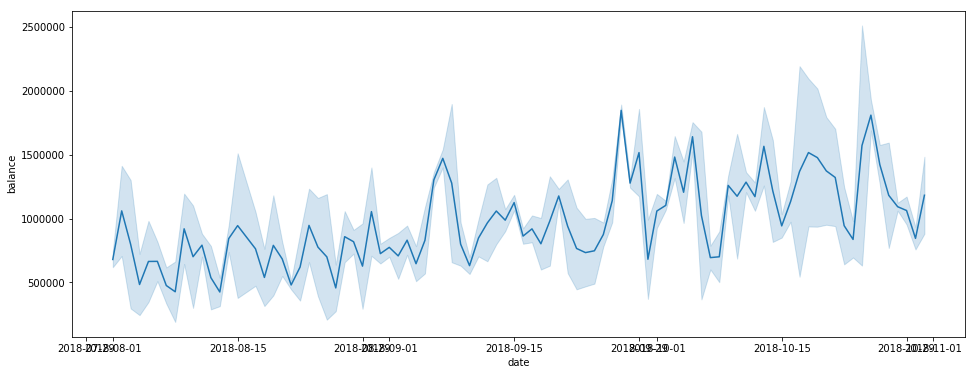

In [36]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",data=accunt_balance)

In [37]:
#Account balance (mean) over dates.

In [38]:
acc_bal_mean= dd.groupby(["date",'gender'])["balance"].mean().reset_index()
acc_bal_mean.head(5)

,date,gender,balance
0,2018-08-01,F,8728.854789
1,2018-08-01,M,11230.392879
2,2018-08-02,F,10258.646232
3,2018-08-02,M,17043.654578
4,2018-08-03,F,3756.823038


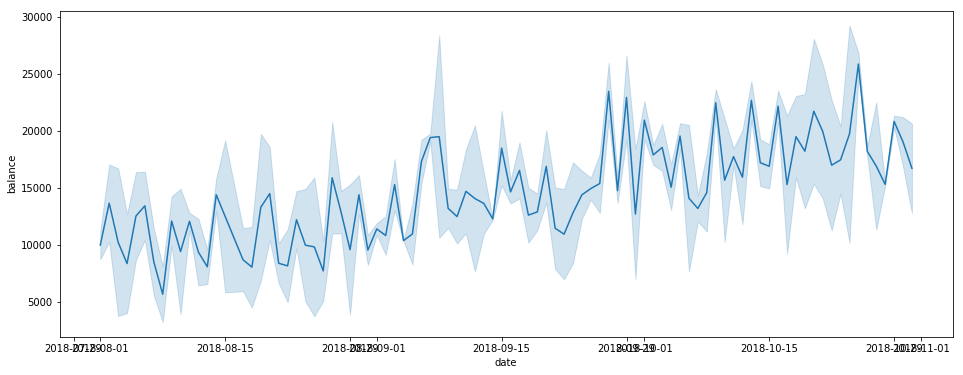

In [39]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",data=acc_bal_mean)

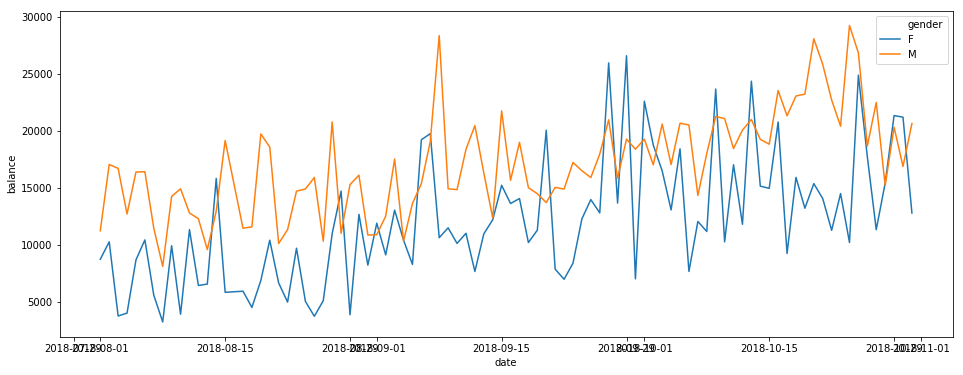

In [40]:
plt.figure(figsize=(16, 6))
sns.lineplot(y="balance",x="date",hue="gender",data=acc_bal_mean)

In [41]:
#Account balance (mean) for various states over dates¶

In [42]:
acc_bal_state_mean= dd.groupby(["date",'merchant_state'])["balance"].mean().reset_index()
acc_bal_state_mean.head(5)

,date,merchant_state,balance
0,2018-08-01,NSW,3570.146429
1,2018-08-01,NT,366.056667
2,2018-08-01,QLD,5459.165294
3,2018-08-01,SA,5728.495000
4,2018-08-01,TAS,6924.650000


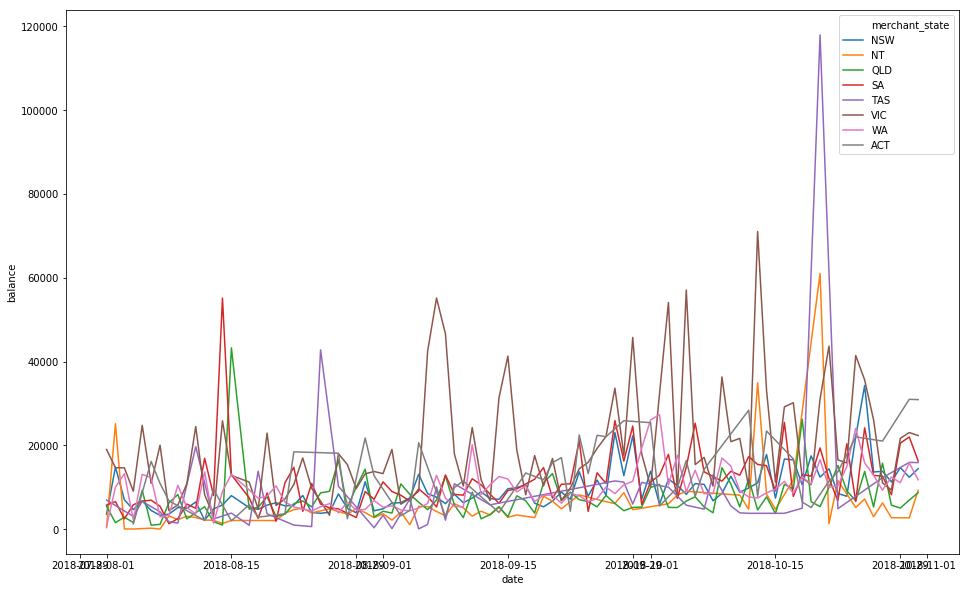

In [43]:
plt.figure(figsize=(16, 10))
sns.lineplot(y="balance",x="date",hue="merchant_state",data=acc_bal_state_mean)

In [44]:
#Account balance (mean) for various states (days average)

In [45]:
acc_bal_state= dd.groupby(['merchant_state',"gender"])["balance"].mean().reset_index()
acc_bal_state.head

<bound method NDFrame.head of    merchant_state gender       balance
0             ACT      F  14433.733913
1             ACT      M   9176.572593
2             NSW      F   8855.846765
3             NSW      M   9936.826013
4              NT      F   4730.673850
5              NT      M  38011.864000
6             QLD      F   2994.443750
7             QLD      M  11428.045648
8              SA      F  11307.189714
9              SA      M  10924.267706
10            TAS      F   2714.771875
11            TAS      M  14113.011731
12            VIC      F  22374.283856
13            VIC      M  17593.964666
14             WA      F   6261.642588
15             WA      M  14971.977517>

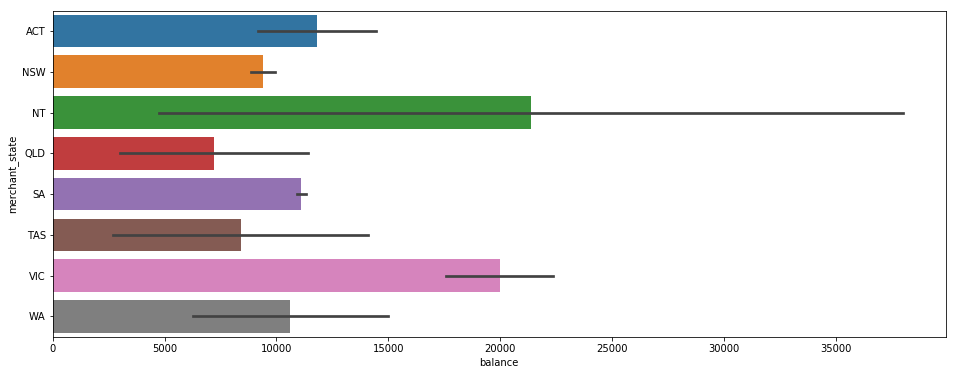

In [46]:
plt.figure(figsize=(16, 6))
sns.barplot(x="balance", y="merchant_state",  data=acc_bal_state)

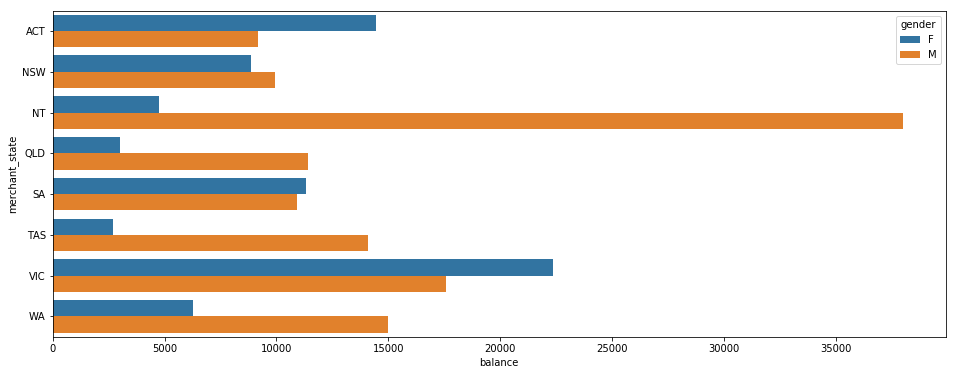

In [47]:
plt.figure(figsize=(16, 6))
sns.barplot(x="balance", y="merchant_state",hue="gender",  data=acc_bal_state)

In [48]:
#Total transaction by age

In [50]:
age_amount_sum= dd.groupby(['age',"gender"])["amount"].sum().reset_index()
age_amount_sum.head()

,age,gender,amount
0,18,F,45124.14
1,18,M,34020.50
2,19,F,84318.80
3,19,M,61733.92
4,20,F,49579.79


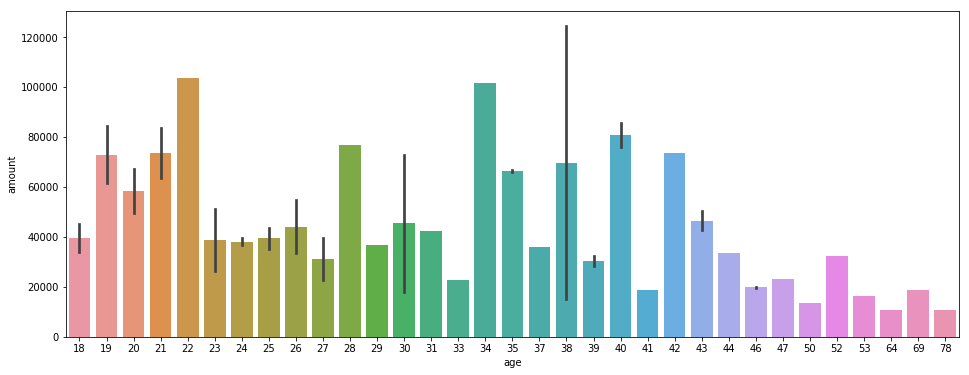

In [51]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age",  data=age_amount_sum)

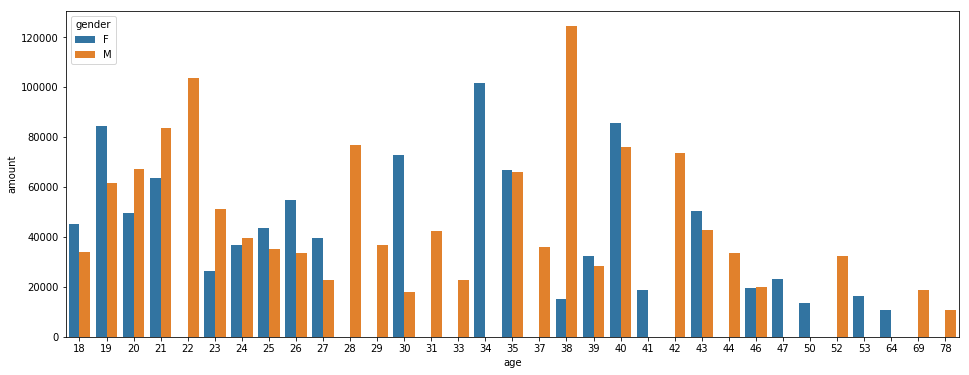

In [52]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age", hue="gender" ,data=age_amount_sum)

In [53]:
#Mean transaction by age

In [54]:
age_amount_mean= dd.groupby(['age',"gender"])["amount"].mean().reset_index()
age_amount_mean.head()

,age,gender,amount
0,18,F,151.933131
1,18,M,234.624138
2,19,F,244.402319
3,19,M,177.396322
4,20,F,135.835041


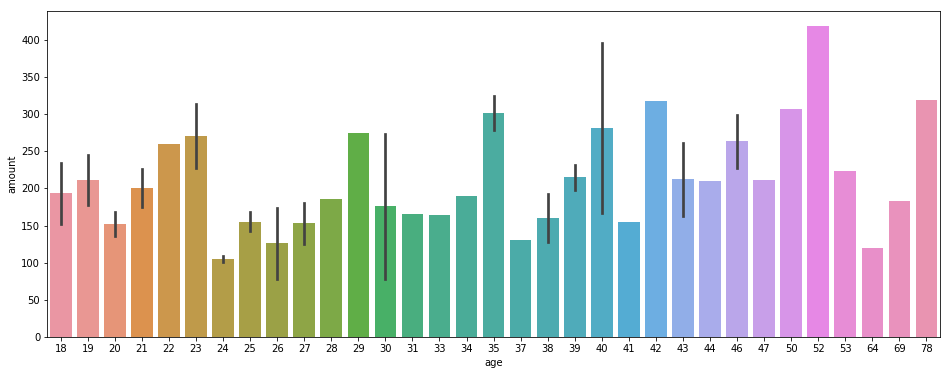

In [55]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age",  data=age_amount_mean)

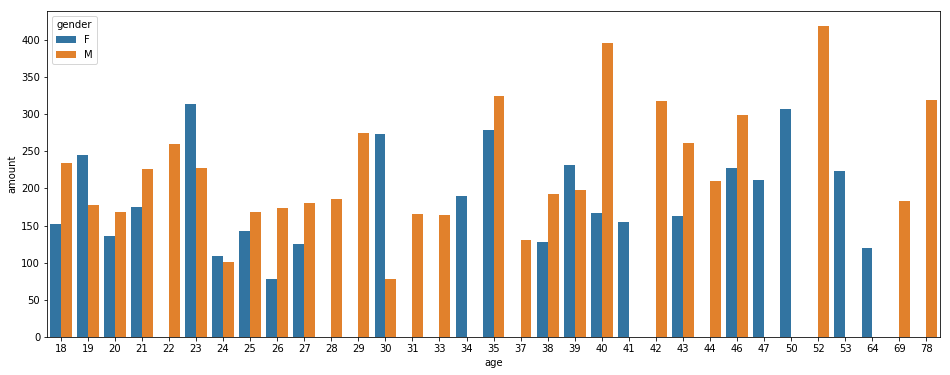

In [56]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age", hue="gender", data=age_amount_mean)

In [57]:
#Debit-Credit transaction mean by gender

In [58]:
debit_credit= dd.groupby(["movement","gender"])["amount"].mean().reset_index()
debit_credit

,movement,gender,amount
0,credit,F,1679.370477
1,credit,M,2096.811681
2,debit,F,49.946881
3,debit,M,54.980407


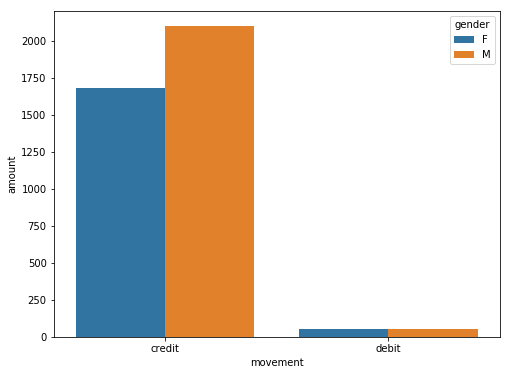

In [59]:
plt.figure(figsize=(8, 6))
sns.barplot(y="amount", x="movement", hue="gender", data=debit_credit)

In [60]:
#Debit-Credit transaction total by gender

In [61]:
debit_credit_total= dd.groupby(["movement","gender"])["amount"].sum().reset_index()
debit_credit_total

,movement,gender,amount
0,credit,F,703656.23
1,credit,M,972920.62
2,debit,F,266666.40
3,debit,M,320040.95


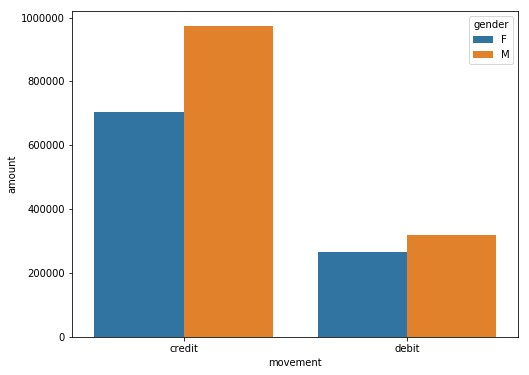

In [62]:
plt.figure(figsize=(8, 6))
sns.barplot(y="amount",x="movement",hue="gender",data=debit_credit_total)

In [63]:
#Debit-Credit transaction sum by age

In [64]:
dc_age_total= dd.groupby(["movement","age"])["amount"].sum().reset_index()
dc_age_total.head()

,movement,age,amount
0,credit,18,59762.72
1,credit,19,115785.36
2,credit,20,84511.81
3,credit,21,107137.60
4,credit,22,81124.69


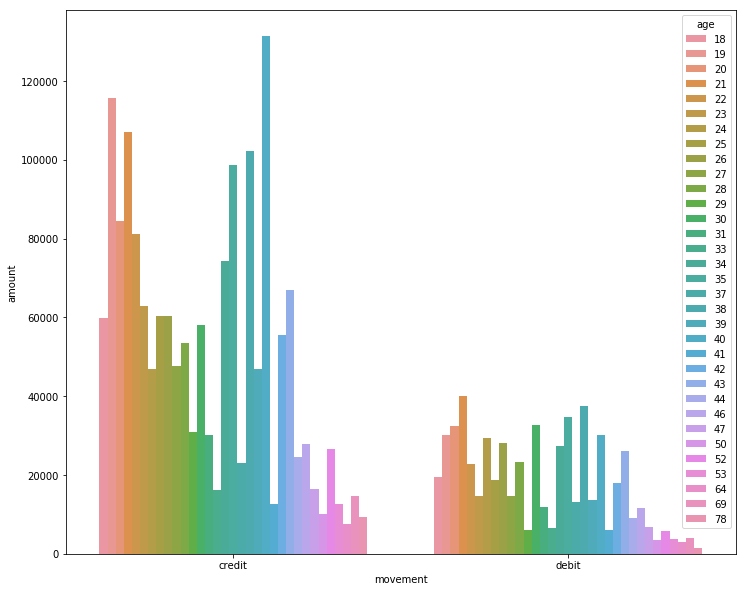

In [65]:
plt.figure(figsize=(12, 10))
sns.barplot(y="amount", x="movement", hue="age", data=dc_age_total)

In [66]:
#Debit-Credit transaction mean by age

In [67]:
dc_age_mean= dd.groupby(["movement","age"])["amount"].mean().reset_index()
dc_age_mean.head()

,movement,age,amount
0,credit,18,1867.585000
1,credit,19,2517.073043
2,credit,20,1509.139464
3,credit,21,1984.029630
4,credit,22,2080.120256


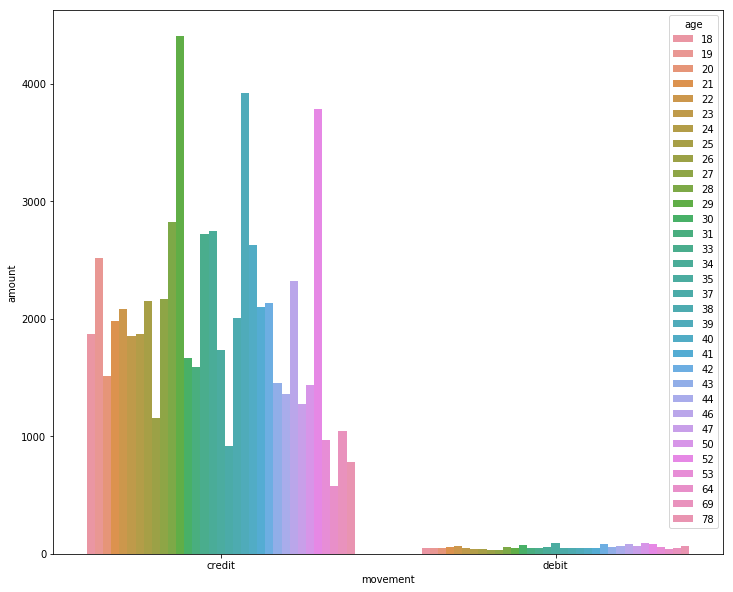

In [68]:
plt.figure(figsize=(12, 10))
sns.barplot(y="amount", x="movement", hue="age", data=dc_age_mean)

In [69]:
#Plotting world map cooridinates

In [70]:
df=dd[["amount",'merchant_long_lat',"merchant_suburb","movement","gender"]]

In [71]:
df=df.dropna()
df = df.reindex(columns = df.columns.tolist() + ['long','lat'])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 7 columns):
amount               7717 non-null float64
merchant_long_lat    7717 non-null object
merchant_suburb      7717 non-null object
movement             7717 non-null object
gender               7717 non-null object
long                 0 non-null float64
lat                  0 non-null float64
dtypes: float64(3), object(4)
memory usage: 482.3+ KB


In [73]:
longitude=[]
latitude=[]

for row in df['merchant_long_lat']:
    
    longitude.append(row.split(' ')[0])
    latitude.append(row.split(' ')[1])
    
df["long"]=longitude
df["lat"]=latitude

In [74]:
df.head()

,amount,merchant_long_lat,merchant_suburb,movement,gender,long,lat
0,16.25,153.38 -27.99,Ashmore,debit,F,153.38,-27.99
1,14.19,151.21 -33.87,Sydney,debit,F,151.21,-33.87
2,6.42,151.21 -33.87,Sydney,debit,M,151.21,-33.87
3,40.90,153.05 -26.68,Buderim,debit,F,153.05,-26.68
4,3.25,153.44 -28.06,Mermaid Beach,debit,F,153.44,-28.06


In [75]:
df[["long", "lat"]] = df[["long", "lat"]].apply(pd.to_numeric)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 7 columns):
amount               7717 non-null float64
merchant_long_lat    7717 non-null object
merchant_suburb      7717 non-null object
movement             7717 non-null object
gender               7717 non-null object
long                 7717 non-null float64
lat                  7717 non-null float64
dtypes: float64(3), object(4)
memory usage: 482.3+ KB


In [77]:
#Grouping by their mean balance and transaction amount

In [78]:
data_cust=dd[["customer_id","first_name","age","balance",'amount']]

In [79]:
customer=data_cust.groupby(["customer_id","age","first_name"])["balance","amount"].mean().reset_index()

In [80]:
customer.head()

,customer_id,age,first_name,balance,amount
0,CUS-1005756958,53,Stephanie,2275.852055,222.862603
1,CUS-1117979751,21,Lucas,9829.929000,339.843700
2,CUS-1140341822,28,Dustin,5699.212250,212.632500
3,CUS-1147642491,34,Robin,9032.841186,245.600169
4,CUS-1196156254,34,Jessica,22272.433755,147.145796


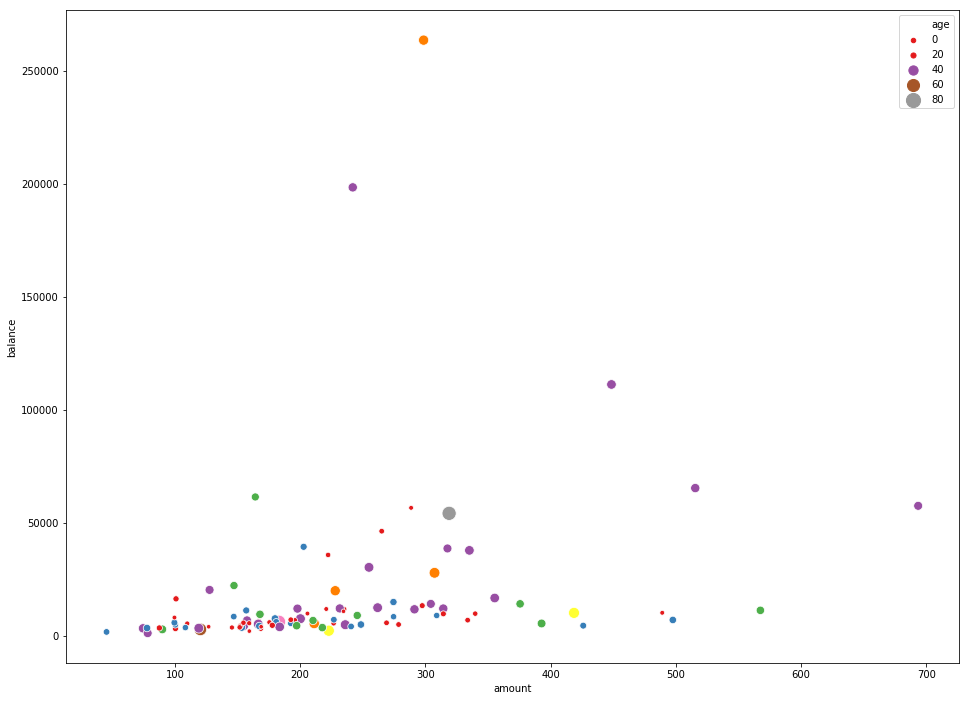

In [81]:
plt.figure(figsize=(16, 12))
sns.scatterplot(y="balance", x="amount",hue="age",palette="Set1",size="age",sizes=(20, 200), data=customer)

In [82]:
#2D customer segmentation

In [83]:
#KMeans clustering

from sklearn.cluster import KMeans

In [84]:
X=customer[["balance","amount"]].values
X.shape

(100, 2)

In [85]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

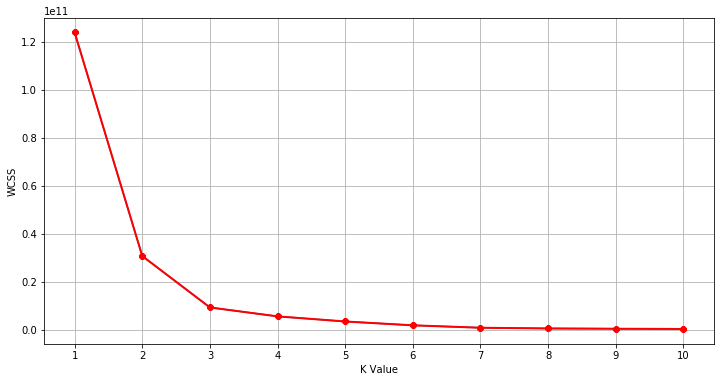

In [86]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [87]:
km1=KMeans(n_clusters=3)

In [88]:
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [89]:
y=km1.predict(X)

In [90]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

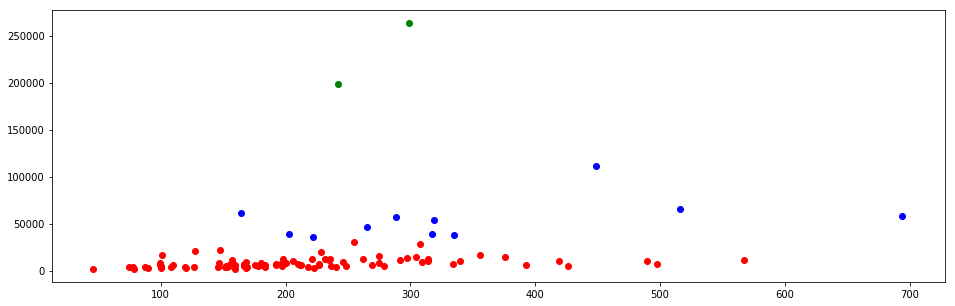

In [91]:
plt.figure(figsize=(16, 5))
plt.scatter(X[y==0,1],X[y==0,0],color='red')
plt.scatter(X[y==1,1],X[y==1,0],color='green')
plt.scatter(X[y==2,1],X[y==2,0],color='blue')

In [92]:
#3D customer segmentation

In [93]:
from mpl_toolkits.mplot3d import Axes3D

In [94]:
X=customer[["balance","amount","age"]].values
X.shape

(100, 3)

In [95]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

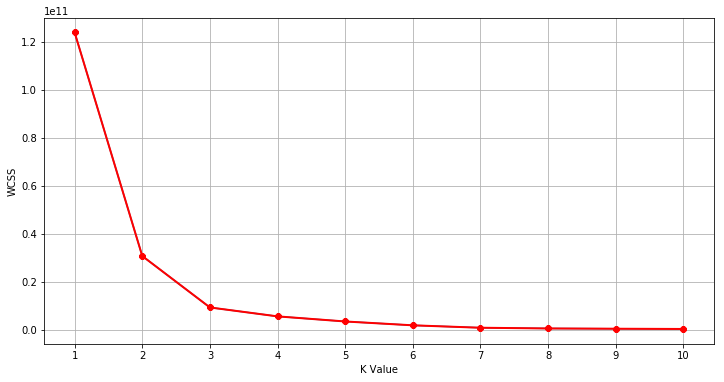

In [96]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [97]:
km2 = KMeans(n_clusters=3)
clusters = km2.fit_predict(X)
customer["label"] = clusters

In [98]:
#3D plot for visualizing customer groups

Text(0.5, 0, 'amount')

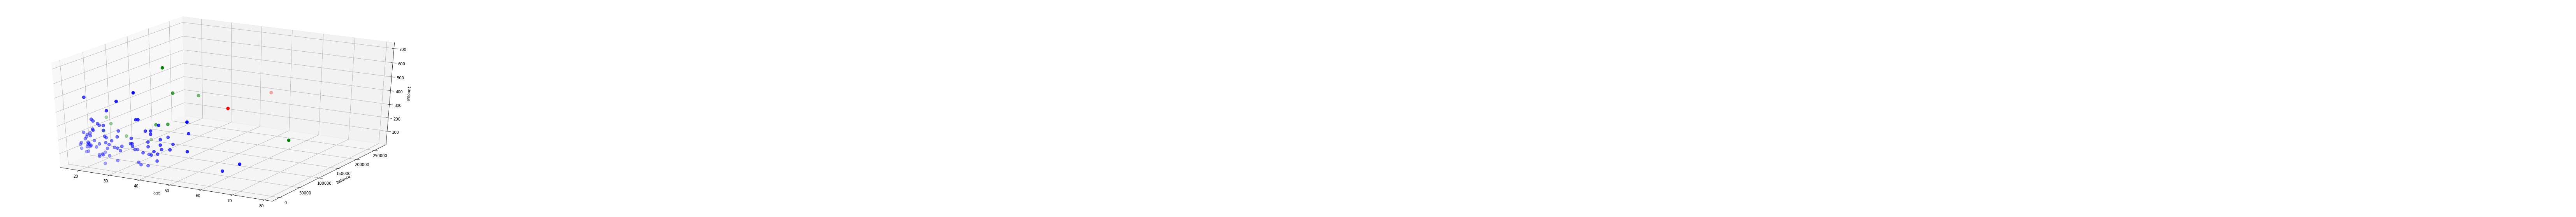

In [99]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer.age[customer.label == 0], customer["balance"][customer.label == 0], customer["amount"][customer.label == 0], c='blue', s=60)
ax.scatter(customer.age[customer.label == 1], customer["balance"][customer.label == 1], customer["amount"][customer.label == 1], c='red', s=60)
ax.scatter(customer.age[customer.label == 2], customer["balance"][customer.label == 2], customer["amount"][customer.label == 2], c='green', s=60)
plt.xlabel("age")
plt.ylabel("balance")
ax.set_zlabel('amount')